# Exploring 67 years of LEGO
> The Rebrickable database includes data on every LEGO set that ever been sold; the names of the sets, what bricks they contain, what color the bricks are, etc. It might be small bricks, but this is big data! In this project, you will get to explore the Rebrickable database. To do this you need to know your way around pandas dataframes This is the Result of Project "Exploring 67 years of LEGO", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Data_Science]
- image: images/lego-bricks.jpeg

## 1. Introduction
<p>Everyone loves Lego (unless you ever stepped on one). Did you know by the way that "Lego" was derived from the Danish phrase leg godt, which means "play well"? Unless you speak Danish, probably not. </p>
<p>In this project, we will analyze a fascinating dataset on every single lego block that has ever been built!</p>

![lego](image/lego-bricks.jpeg)

## 2. Reading Data
<p>A comprehensive database of lego blocks is provided by <a href="https://rebrickable.com/downloads/">Rebrickable</a>. The data is available as csv files and the schema is shown below.</p>

![schema](image/downloads_schema.png)

<p>Let us start by reading in the colors data to get a sense of the diversity of lego sets!</p>

In [1]:
# Import modules
import pandas as pd

# Read colors data
colors = pd.read_csv('dataset/colors.csv')

# Print the first few rows
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


## 3. Exploring Colors
<p>Now that we have read the <code>colors</code> data, we can start exploring it! Let us start by understanding the number of colors available.</p>

In [2]:
# How many distinct colors are available?
num_colors = len(colors.name.unique())
print(num_colors)

135


## 4. Transparent Colors in Lego Sets
<p>The <code>colors</code> data has a column named <code>is_trans</code> that indicates whether a color is transparent or not. It would be interesting to explore the distribution of transparent vs. non-transparent colors.</p>

In [3]:
# colors_summary: Distribution of colors based on transparency
colors_summary = colors.groupby('is_trans').count()
colors_summary

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


## 5. Explore Lego Sets
<p>Another interesting dataset available in this database is the <code>sets</code> data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained. </p>

![sample](image/1k4PoXs.png)

<p>Let us use this data to explore how the average number of parts in Lego sets has varied over the years.</p>

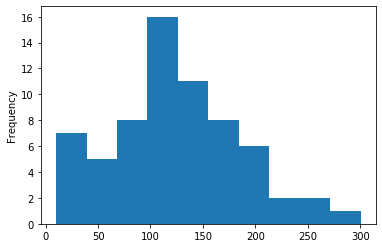

In [4]:
%matplotlib inline
# Read sets data as `sets`
sets = pd.read_csv('./dataset/sets.csv')

# Create a summary of average number of parts by year: `parts_by_year`
parts_by_year = sets.groupby('year').num_parts.mean()

# Plot trends in average number of parts by year
parts_by_year.plot(kind='hist');


## 6. Lego Themes Over Years
<p>Lego blocks ship under multiple <a href="https://shop.lego.com/en-US/Themes">themes</a>. Let us try to get a sense of how the number of themes shipped has varied over the years.</p>

In [6]:
# themes_by_year: Number of themes shipped by year
themes_by_year = sets[['year', 'theme_id']].\
                 groupby('year', as_index=False).agg({'theme_id': pd.Series.nunique})

themes_by_year.head()

,year,theme_id
0,1950,2
1,1953,1
2,1954,2
3,1955,4
4,1956,3


## 7. Wrapping It All Up!
<p>Lego blocks offer an unlimited amount of fun across ages. We explored some interesting trends around colors, parts, and themes. </p>